In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_4820/1914289367.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = int(nova_coord[1, 0]/nova_coord[2])
/tmp/ipykernel_4820/1914289367.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(nova_coord[0, 0]/nova_coord[2])


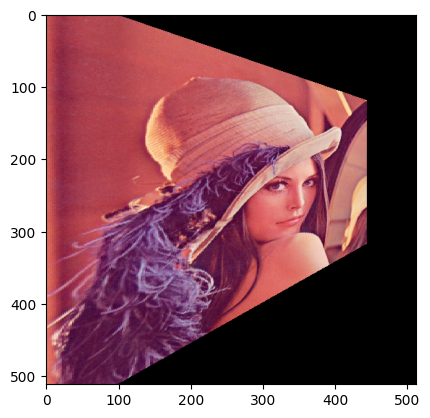

In [13]:
# warp nao linear

def warp_perspective(img, M):
    img2 = np.zeros_like(img)
    M_inv = np.linalg.inv(M)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            coord = np.array([[j], [i], [1]])
            nova_coord = M_inv@coord
            x = int(nova_coord[1, 0]/nova_coord[2])
            y = int(nova_coord[0, 0]/nova_coord[2])

            if y > 0 and y < img.shape[0] - 1 and x > 0 and x < img.shape[1] - 1:
                img2[i, j] = img[x, y]
    
    return img2

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path) 
porigem = [[100, 100],
     [100, 400],
     [400, 400],
     [400, 100]]

pdestino = [[100, 100],
[100, 400],
[400, 290],
[400, 150]]

porigem = np.float32(np.array(porigem))
pdestino = np.float32(np.array(pdestino))
M = cv2.getPerspectiveTransform(porigem, pdestino)

img_warp = warp_perspective(img, M)

plt.imshow(cv2.cvtColor(img_warp, cv2.COLOR_BGR2RGB))
plt.show()


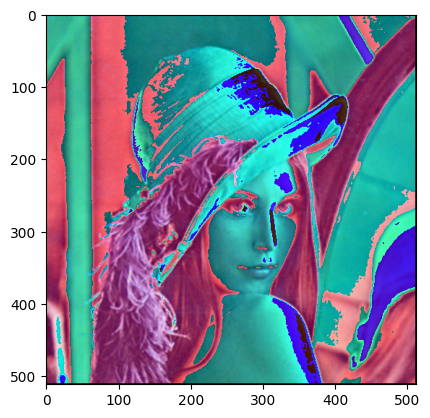

In [24]:
# filtro media
def filtro_espacial(img, k):
    img2 = np.zeros_like(img)
    lk = k.shape[0] 
    ck = k.shape[1] 
    llin = int(lk/2) 
    lcol = int(ck/2)
    
    for i in range(llin, img.shape[0] - llin):
        for j in range(lcol, img.shape[1] - lcol):
            res = 0
            for m in range(-llin, llin + 1):
                for n in range(-lcol, lcol + 1):
                    res += img[i + m, j + n]*k[llin + m, n + lcol]
            img2[i, j] = res

    return img2

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
# n = 7
# k = np.ones((n, n))/n**2
k = [[0.3679, 0.6065, 0.3679],
     [0.6065, 1, 0.6065],
     [0.3679, 0.6065, 0.3679]]
k = np.array(k)/4.8905

img_filtro = filtro_espacial(img, k)
plt.imshow(cv2.cvtColor(img_filtro, cv2.COLOR_BGR2RGB))
plt.show()
                    
